In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def dump_signal(filename, signal, t):
    payload = int(t).to_bytes(4, 'little') + \
              int(len(signal.shape)).to_bytes(4, 'little')
    for axis in signal.shape:
        payload += int(axis).to_bytes(8, 'little')
    payload += signal.tobytes()
        
    with open(filename, "wb") as f:
        f.write(payload)
        
        
def read_signal(filename):
    with open(filename, "rb") as f:
        payload = f.read()
        
    offset = 4
    dims = np.frombuffer(payload, np.int32, 1, offset)[0]
    offset += 4
    
    shape = []
    length = 1
    for i in range(dims):
        shape.append(np.frombuffer(payload, np.int64, 1, offset)[0])
        length *= shape[-1] 
        offset += 8
    shape = tuple(shape)
    signal = np.frombuffer(payload, np.float32, length, offset)
    return signal.reshape(shape)

In [3]:
F = np.asarray([
    9.11653248e-06,  2.62757708e-05,  4.43069066e-05,  4.80156199e-05,
    2.01716419e-05, -4.79548759e-05, -1.45283658e-04, -2.35415025e-04,
   -2.63132813e-04, -1.75046584e-04,  5.04629730e-05,  3.75954269e-04,
    6.95779863e-04,  8.57371305e-04,  7.14586328e-04,  1.99478220e-04,
   -6.15022433e-04, -1.49429722e-03, -2.08735128e-03, -2.03997282e-03,
   -1.14725034e-03,  5.09373347e-04,  2.50485053e-03,  4.14136149e-03,
    4.65417629e-03,  3.50427672e-03,  6.60461827e-04, -3.24704499e-03,
   -6.99668346e-03, -9.09777348e-03, -8.29994171e-03, -4.13651602e-03,
    2.69884992e-03,  1.03232756e-02,  1.60722631e-02,  1.72897964e-02,
    1.22979194e-02,  1.24128484e-03, -1.35077606e-02, -2.75994751e-02,
   -3.56412910e-02, -3.26237130e-02, -1.54598909e-02,  1.58199937e-02,
    5.76190751e-02,  1.03276147e-01,  1.44454776e-01,  1.73084041e-01,
    1.83334751e-01,  1.73084041e-01,  1.44454776e-01,  1.03276147e-01,
    5.76190751e-02,  1.58199937e-02, -1.54598909e-02, -3.26237130e-02,
   -3.56412910e-02, -2.75994751e-02, -1.35077606e-02,  1.24128484e-03,
    1.22979194e-02,  1.72897964e-02,  1.60722631e-02,  1.03232756e-02,
    2.69884992e-03, -4.13651602e-03, -8.29994171e-03, -9.09777348e-03,
   -6.99668346e-03, -3.24704499e-03,  6.60461827e-04,  3.50427672e-03,
    4.65417629e-03,  4.14136149e-03,  2.50485053e-03,  5.09373347e-04,
   -1.14725034e-03, -2.03997282e-03, -2.08735128e-03, -1.49429722e-03,
   -6.15022433e-04,  1.99478220e-04,  7.14586328e-04,  8.57371305e-04,
    6.95779863e-04,  3.75954269e-04,  5.04629730e-05, -1.75046584e-04,
   -2.63132813e-04, -2.35415025e-04, -1.45283658e-04, -4.79548759e-05,
    2.01716419e-05,  4.80156199e-05,  4.43069066e-05,  2.62757708e-05,
    9.11653248e-06
])

dump_signal("filter.bin", np.float32(F), 3)

In [21]:
Fs = 200E3

t = np.linspace(0, 0.2, int(0.2 * Fs))

S = np.sin(2 * np.pi * 50E3 * t) + \
    np.sin(2 * np.pi * 45E3 * t) + \
    np.sin(2 * np.pi * 40E3 * t) + \
    np.sin(2 * np.pi * 5E3 * t) + \
    np.sin(2 * np.pi * 10E3 * t) + \
    0.01 * np.random.rand(t.shape[0])

S = np.pad(np.float32(S), (F.shape[0] - 1, 0), 'constant', constant_values=(0, 0))
dump_signal("signal.bin", S, 3)

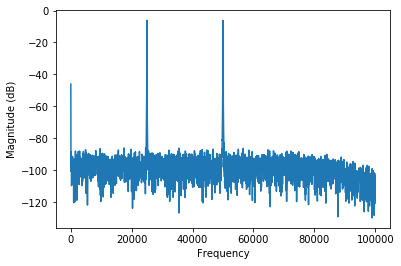

In [43]:
plt.magnitude_spectrum(np.convolve(S, F)[::5], Fs=Fs, scale='dB')
plt.show()

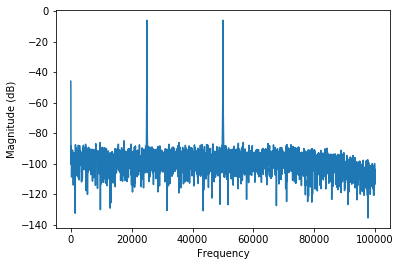

In [42]:
plt.magnitude_spectrum(read_signal("filtered.bin")[::5], Fs=Fs, scale='dB')
plt.show()

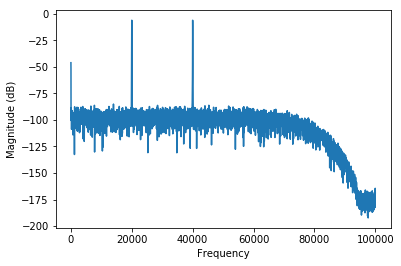

In [40]:
D = read_signal("decimted.bin")
plt.magnitude_spectrum(D, Fs=Fs, scale='dB')
plt.show()